## full-FORCE: A target-based method for training recurrent networks
Brian DePasquale*, Christopher J. Cueva, Kanaka Rajan, G. Sean Escola, L. F.Abbott

PLOS ONE. 2018 Feb 7;13(2):e0191527. 

Use a target generating network with fixed connectivity driven by both its output and the stimulus to optimize the connectivity of a task performing network until it internally encodes the activity of the target.

## Target Generating Network

$$ \tau \frac{d\mathbf{x^D}}{dt} = -\mathbf{x^D} + \mathbf{J^D} H(\mathbf{x^D}) + \mathbf{u} f_{out}(t) + \mathbf{u_{in}} f_{in}(t) $$

- $\mathbf{x^D}$ is a vector of the activities of $N$ units.
- $\mathbf{J^D}$ is an $N \times N$ matrix of fixed random connections drawn from a Gaussian distribution with zero mean and $g^2/N$ variance ($g>1$).
- $H(\cdot)$ is a nonlinear mapping of activity to firing rate. Here, $H(\cdot) = \tanh (\cdot)$. 
- $\mathbf{u}$ is a random weighting of the network's output, $f_{out}(t)$, onto the network. 
- $\mathbf{u_{in}}$ is a random weighting of the input stimulus, $f_{in}(t)$, onto the network.
- $\mathbf{u}$ and $\mathbf{u_{in}}$ are independently drawn from a uniform distribution $\isin [-1, 1]$.

## Task Performing Network
$$ \tau \frac{d\mathbf{x}}{dt} = -\mathbf{x} + \mathbf{J} H(\mathbf{x}) + \mathbf{u_{in}} f_{in}(t) $$
$$ f_{out}(t) \equiv z(t) = \mathbf{w}^T H(\mathbf{x}(t)) $$

## Cost function, error term and update rule
- Cost function:
$$ C^{fF}_\mathbf{J} = \langle | \mathbf{J} H(\mathbf{x}(t)) - \mathbf{J^D} H(\mathbf{x^D}(t)) - \mathbf{u} f_{out}(t) |^2 \rangle $$

- Error term $e$ at RLS step $t$:
$$ e(t) = \mathbf{J}(t+\Delta t) H(\mathbf{x}(t)) - \mathbf{J^D} H(\mathbf{x^D}(t)) - \mathbf{u} f_{out}(t) $$

- RLS update rule:
$$\mathbf{J}(t) = \mathbf{J}(t+\Delta t) - e(t) P(t) H(\mathbf{x}(t)) $$

where $P(t)$ is a running estimate of the inverse of the correlation matrix of $H(\mathbf{x}(t))$.

$$ P(t) = P(t+\Delta t) - \frac{P(t+\Delta t) H(\mathbf{x}(t)) H(\mathbf{x}(t))^T P(t+\Delta t)}{1 + H(\mathbf{x}(t))^T P(t+\Delta t) H(\mathbf{x}(t))} $$
$$ P(0) = \mathbf{I}/\alpha $$
- where $\alpha$ is the effective learning rate and sets the scale of the $\ell _2$ regularization term.
- Adjust $\alpha$ to improve learning.
- Here, $\alpha = 1$.

## Extension: Hints
- A priori hints of activity internal to the network that are needed to solve the task can be used to improve learning.
- The target generating network becomes:
$$ \tau \frac{d\mathbf{x^D}}{dt} = -\mathbf{x^D} + \mathbf{J^D} H(\mathbf{x^D}) + \mathbf{u} f_{out}(t) + \mathbf{u_{in}} f_{in}(t) + \mathbf{u_{hint}} f_{hint}(t)$$
- $\mathbf{u_{hint}}$ is a random weighting of the input stimulus, $f_{hint}(t)$, onto the network.
- The cost function becomes:
$$ C^{fF hint}_\mathbf{J} = \langle | \mathbf{J} H(\mathbf{x}(t)) - \mathbf{J^D} H(\mathbf{x^D}(t)) - \mathbf{u} f_{out}(t) - \mathbf{u_{hint}} f_{hint}(t) |^2 \rangle $$


### periodic input testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget 
plt.show()

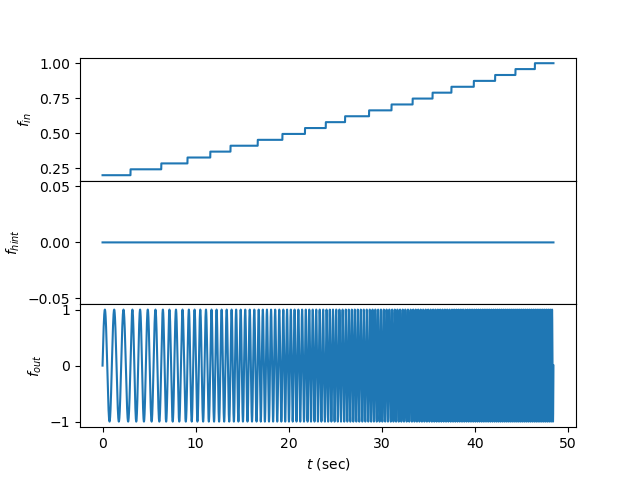

In [2]:
def inps_and_targs_periodic(dt, plot=False):
    n = 20
    pmin = 3
    
    min = 1
    mx = 5
    freqs = np.linspace(min, mx, n) 

    fin = np.zeros(0)
    fout = np.zeros(0)
    fhint = np.zeros(0)

    for f in freqs:
        p = max(2 * np.ceil(f), pmin)
        phase = np.linspace(0, p * 2 * np.pi, num=int(p / (f * dt))) 
        fin = np.hstack((fin, np.zeros(int(p / (f * dt))) + f/mx))
        fout = np.hstack((fout, np.sin(phase)))
        fhint = np.hstack((fhint, np.zeros(int(p / (f * dt)))))
    #fin[0:10] = 1

    t = np.linspace(0, np.shape(fin)[0]/1000, num = np.shape(fin)[0])

    fin = np.reshape(fin, (1, fin.size)).T
    fout = np.reshape(fout, (1, fout.size)).T
    fhint = np.reshape(fhint, (1, fhint.size)).T

    if plot:
        fig, axs = plt.subplots(3, 1, sharex=True)
        plt.subplots_adjust(hspace=0)
        labels = ['$f_{in}$', '$f_{hint}$', '$f_{out}$']
        for ax, y, label in zip(axs, [fin, fhint, fout], labels):
            ax.plot(t, y)
            ax.set_ylabel(label)
        axs[-1].set_xlabel('$t$ (sec)')

    return (fin, fout, fhint)

dt = 0.001
fin, fout, _ = inps_and_targs_periodic(dt, plot=True)

Initializing...
Training network...
Batch 1 of 10, 40 trials: 
........................................
Batch 2 of 10, 40 trials: 
........................................
Batch 3 of 10, 40 trials: 
........................................
Batch 4 of 10, 40 trials: 
........................................
Batch 5 of 10, 40 trials: 
........................................
Batch 6 of 10, 40 trials: 
........................................
Batch 7 of 10, 40 trials: 
........................................
Batch 8 of 10, 40 trials: 
........................................
Batch 9 of 10, 40 trials: 
........................................
Batch 10 of 10, 40 trials: 
........................................
Done training!


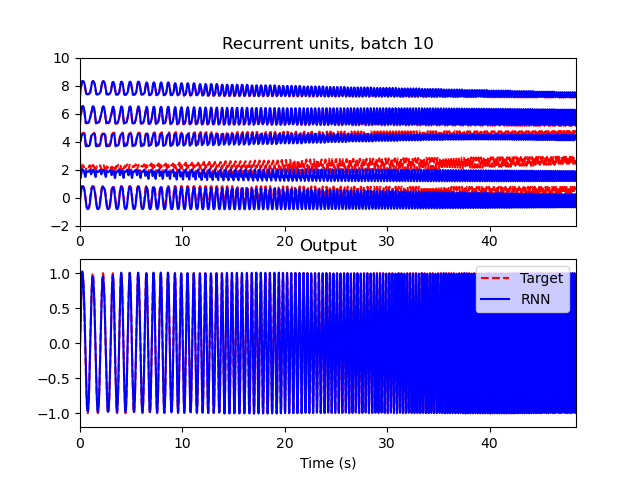

In [3]:
import FF_Demo as ff

p2 = ff.create_parameters()
p2['network_size'] = 100
p2['ff_num_batches'] = 10
p2['ff_trials_per_batch'] = 40

net2 = ff.RNN(p2, 1, 1) 

net2.train(inps_and_targs_periodic, monitor_training=0)

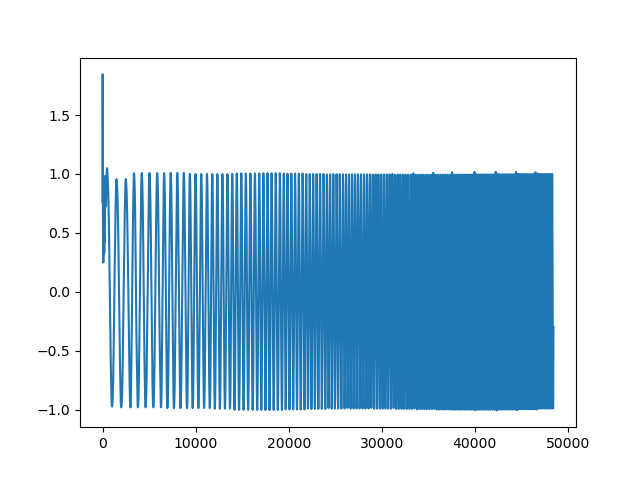

In [8]:
fig, axs = plt.subplots()
axs.plot(net2.run(fin)[0])

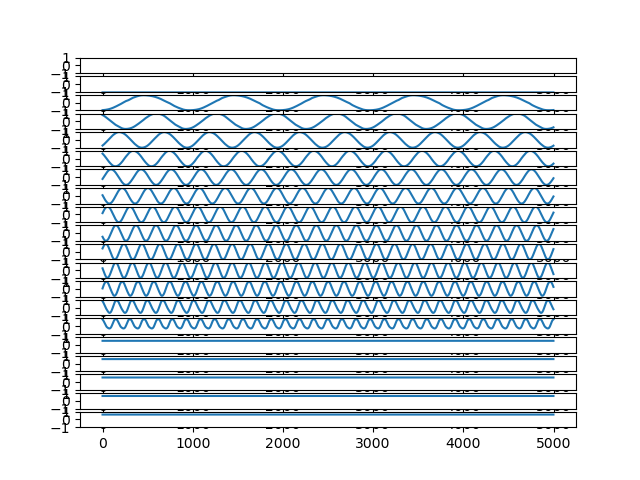

In [5]:
n = 20
t = 5000

activities = np.zeros((n, t, 100))
outputs = np.zeros((n, t, 1))
fig, axs = plt.subplots(n)
for i in range(n):
    net2.run(np.zeros(3*t) + i/10, record_flag=1)
    res = net2.run(np.zeros(t) + i/10, record_flag=1)
    outputs[i, :] = np.copy(res[0])
    activities[i, :, :] = np.copy(res[1])
    axs[i].plot(outputs[i, :])
    axs[i].set_ylim(-1, 1)

In [15]:
from sklearn.decomposition import PCA
c = 3

act_pcas = np.zeros((n, t, c))
for i in range(n):
    pca = PCA(n_components=c)
    act_pca = pca.fit_transform(activities[i])
    act_pcas[i, :, :] = np.copy(act_pca)

# fig, ax = plt.subplots()
# pcm = ax.pcolormesh(act_pca)
# fig.colorbar(pcm)

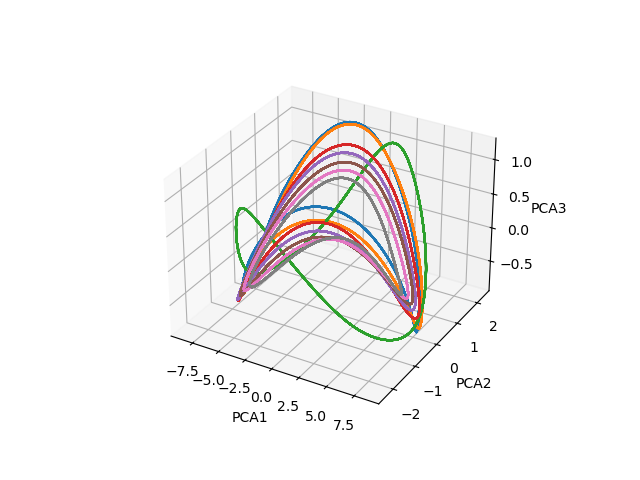

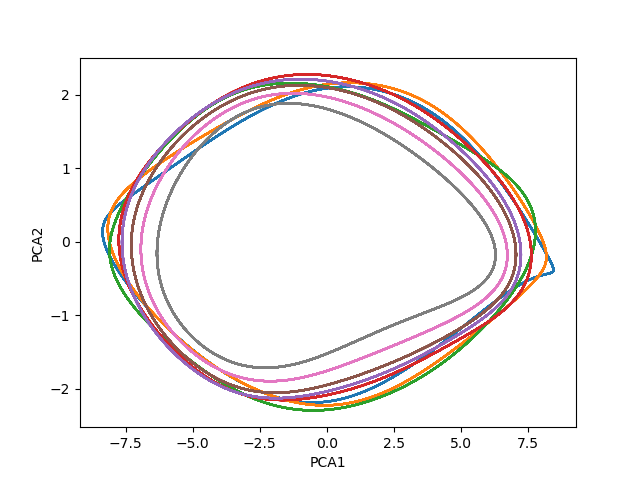

In [18]:
ax = plt.figure().add_subplot(projection='3d')
ax12 = plt.figure().add_subplot()
# ax13 = plt.figure().add_subplot()
# ax23 = plt.figure().add_subplot()

# ax.plot(act_pcas[1, :, 0], act_pcas[1, :, 1], act_pcas[1, :, 2])

for i in range(5, n - 7):
    ax.plot(act_pcas[i, :, 0], act_pcas[i, :, 1], act_pcas[i, :, 2])
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax12.plot(act_pcas[i, :, 0], act_pcas[i, :, 1])
    ax12.set_xlabel('PCA1')
    ax12.set_ylabel('PCA2')
    # ax13.plot(act_pcas[i, :, 0], act_pcas[i, :, 2])
    # ax23.plot(act_pcas[i, :, 1], act_pcas[i, :, 2])


Text(0.5, 1.0, 'Step function inputs')

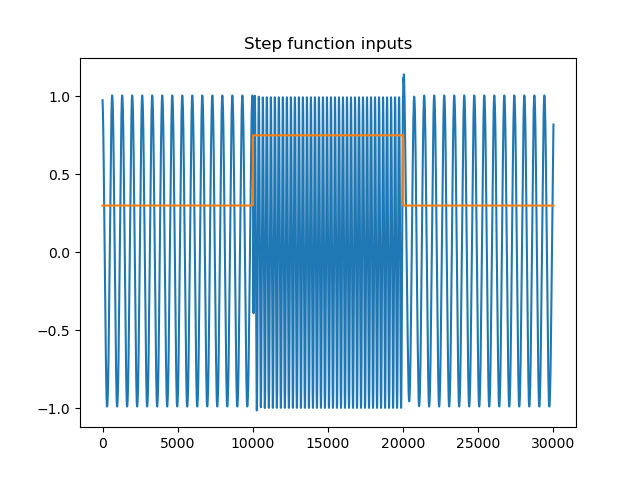

In [36]:
fint = np.zeros(30000) + 0.30
fint[10000:20000] = 0.75

fig, axs = plt.subplots()
testres = net2.run(fint, 1)
axs.plot(testres[0])
axs.plot(fint)
axs.set_title("Frequency modulation")
axs.set_ylabel("Amplitude")
axs.set_xlabel("Timesteps (ms)")

In [31]:
c = 3

pca = PCA(n_components=c)
act_pca = pca.fit_transform(testres[1])
    

Text(0.5, 0, 'PCA3')

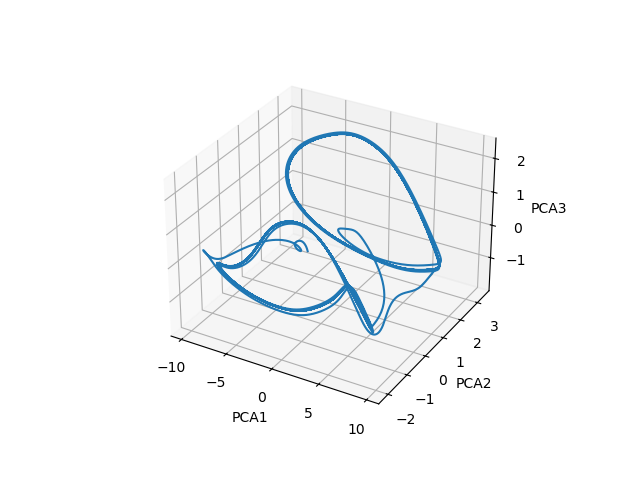

In [32]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(act_pca[:, 0], act_pca[:, 1], act_pca[:, 2])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')